<a href="https://colab.research.google.com/github/lhs7091/PythonDataScienceExam/blob/master/kaggle_DS_survey/kaggle_ML_DS_suervey_2017_EDA_FAQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# google drive mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
#!mv /content/sample_data/kaggle.json ~/.kaggle/
#!chmod 600 ~/.kaggle
#!unzip /content/sample_data/freeforResponses.csv.zip
!unzip /content/sample_data/multipleChoiceResponses.csv.zip


Archive:  /content/sample_data/multipleChoiceResponses.csv.zip
  inflating: multipleChoiceResponses.csv  


In [3]:
!kaggle datasets list -s survey

ref                                                      title                                              size  lastUpdated          downloadCount  
-------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
miroslavsabo/young-people-survey                         Young People Survey                                84KB  2016-12-06 03:10:30          26510  
kaggle/kaggle-survey-2018                                2018 Kaggle ML & DS Survey                          4MB  2018-11-03 22:35:07          11439  
kaggle/kaggle-survey-2017                                2017 Kaggle ML & DS Survey                          4MB  2017-10-27 22:03:03          18408  
osmi/mental-health-in-tech-survey                        Mental Health in Tech Survey                       49KB  2016-11-03 17:28:47          21806  
ruslankl/european-union-lgbt-survey-2012                 EU LGBT Survey                       

In [4]:
!kaggle datasets files stackoverflow/so-survey-2017

name                       size  creationDate         
-------------------------  ----  -------------------  
survey_results_public.csv  89MB  2017-06-15 14:15:47  
survey_results_schema.csv  22KB  2017-06-15 14:15:47  


In [5]:
!kaggle datasets files zillow/zecon

name                           size  creationDate         
----------------------------  -----  -------------------  
DataDictionary.csv              5KB  2018-01-24 23:53:58  
Zip_time_series.csv           746MB  2018-01-24 23:53:58  
City_time_series.csv          658MB  2018-01-24 23:53:58  
all_available_metrics.json      3KB  2018-01-24 23:53:58  
cities_crosswalk.csv            1MB  2018-01-24 23:53:58  
County_time_series.csv        108MB  2018-01-24 23:53:58  
State_time_series.csv           5MB  2018-01-24 23:53:58  
fields_per_level.json          17KB  2018-01-24 23:53:58  
Metro_time_series.csv          54MB  2018-01-24 23:53:58  
CountyCrossWalk_Zillow.csv    227KB  2018-01-24 23:53:58  
Neighborhood_time_series.csv  253MB  2018-01-24 23:53:58  


In [6]:
!kaggle config set -n PATH -v ~/.kaggle/

- PATH is now set to: /root/.kaggle/


In [7]:
!kaggle config view

Configuration values from /root/.kaggle
- username: lhs7091
- path: None
- proxy: None
- competition: None


In [0]:
# for drawing the graph in colab
%matplotlib inline

# Import the standard Python Scientific Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress Deprecation and Incorrect Usage Warnings 
import warnings
warnings.filterwarnings('ignore')

In [13]:
question = pd.read_csv('/content/sample_data/schema.csv')
question.shape

(290, 3)

In [14]:
question.head()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [17]:
# read a csv file, the answers of selection questions by pandas
mcq = pd.read_csv('/content/sample_data/multipleChoiceResponses.csv', encoding="ISO-8859-1", low_memory=False)
mcq.shape

(16716, 228)

In [18]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [19]:
mcq.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,PublicDatasetsSelect,LearningPlatformSelect,LearningPlatformUsefulnessArxiv,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessCollege,LearningPlatformUsefulnessCompany,LearningPlatformUsefulnessConferences,LearningPlatformUsefulnessFriends,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessNewsletters,LearningPlatformUsefulnessCommunities,LearningPlatformUsefulnessDocumentation,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessPodcasts,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessTradeBook,LearningPlatformUsefulnessTutoring,LearningPlatformUsefulnessYouTube,BlogsPodcastsNewslettersSelect,LearningDataScienceTime,JobSkillImportanceBigData,JobSkillImportanceDegree,JobSkillImportanceStats,JobSkillImportanceEnterpriseTools,...,WorkChallengeFrequencyITCoordination,WorkChallengeFrequencyHiringFunds,WorkChallengeFrequencyPrivacy,WorkChallengeFrequencyScaling,WorkChallengeFrequencyEnvironments,WorkChallengeFrequencyClarity,WorkChallengeFrequencyDataAccess,WorkChallengeFrequencyOtherSelect,WorkDataVisualizations,WorkInternalVsExternalTools,WorkMLTeamSeatSelect,WorkDatasets,WorkDatasetsChallenge,WorkDataStorage,WorkDataSharing,WorkDataSourcing,WorkCodeSharing,RemoteWork,CompensationAmount,CompensationCurrency,SalaryChange,JobSatisfaction,JobSearchResource,JobHuntTime,JobFactorLearning,JobFactorSalary,JobFactorOffice,JobFactorLanguages,JobFactorCommute,JobFactorManagement,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,Employed by a company that doesn't perform adv...,SAS Base,Random Forests,F#,Dataset aggregator/platform (i.e. Socrata/Kagg...,"College/University,Conferences,Podcasts,Trade ...",NaN,NaN,NaN,NaN,Very useful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very useful,NaN,NaN,Somewhat useful,NaN,NaN,"Becoming a Data Scientist Podcast,Data Machina...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Often,Most of the time,NaN,NaN,NaN,NaN,26-50% of projects,Do not know,Standalone Team,NaN,NaN,Document-oriented (e.g. MongoDB/Elasticsearch)...,"Company Developed Platform,I don't typically s...",NaN,"Mercurial,Subversion,Other",Always,NaN,NaN,I am not currently employed,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,Random Forests,Python,Dataset aggregator/platform (i.e. Socrata/Kagg...,Kaggle,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Becoming a Data Scientist Podcast,Siraj Raval ...",1-2 years,NaN,Nice to have,Unnecessary,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amazon Web services,Deep learning,R,Dataset aggregator/platform (i.e. Socrata/Kagg...,"Arxiv,College/University,Kaggle,Online courses...",Very useful,NaN,Somewhat useful,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,Very useful,NaN,NaN,NaN,NaN,NaN,NaN,Very useful,"FastML Blog,No Free Hunch Blog,Talking Machine...",1-2 years,Necessary,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Asking friends, family members, or former coll...",1-2,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Impor

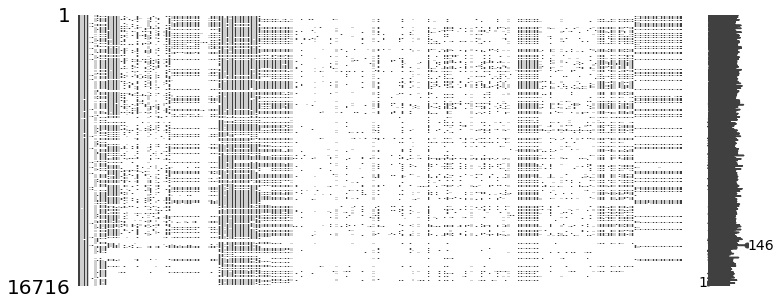

In [20]:
# display NaN data by missingno
# but it's difficult to know because of too much data and columns
import missingno as msno
msno.matrix(mcq, figsize=(12,5))

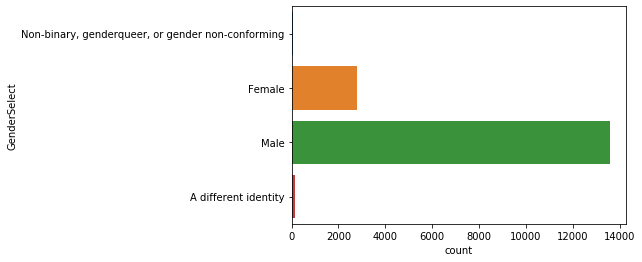

In [21]:
# genders
sns.countplot(y='GenderSelect', data=mcq)

In [22]:
# the number of answers on Countries
con_df = pd.DataFrame(mcq['Country'].value_counts())
con_df['국가'] = con_df.index
con_df.columns = [ '응답수', '국가']
con_df = con_df.reset_index().drop('index', axis=1)
con_df = pd.DataFrame(con_df, columns=['국가', '응답수']) 
con_df.head(20)

,국가,응답수
0,United States,4197
1,India,2704
2,Other,1023
3,Russia,578
4,United Kingdom,535
5,People 's Republic of China,471
6,Brazil,465
7,Germany,460
8,France,442
9,Canada,440


In [23]:
# information of ages
mcq['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

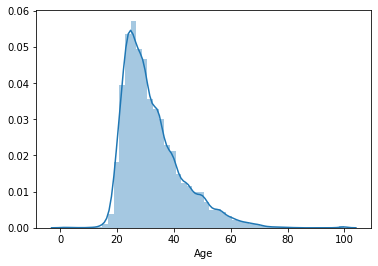

In [24]:
sns.distplot(mcq[mcq['Age']>0]['Age'])

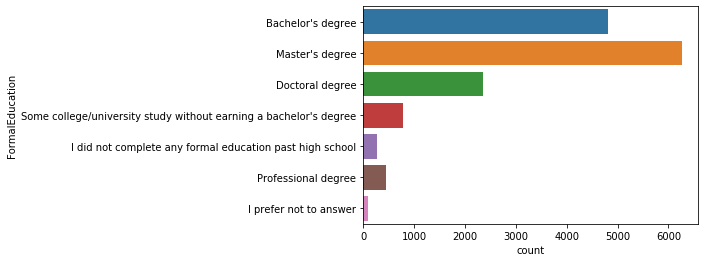

In [25]:
# Graduation
sns.countplot(y='FormalEducation', data=mcq)

In [26]:
# If you use value_counts, 
# count values is displayed group by data(specific column)
# Normalized express : normalization = True
mcq_major_count = pd.DataFrame(mcq['MajorSelect'].value_counts())
mcq_major_percent = pd.DataFrame(mcq['MajorSelect'].value_counts(normalize=True))
mcq_major_df = mcq_major_count.merge(
    mcq_major_percent, left_index=True, right_index=True)
mcq_major_df.columns = ['응답수', '비율']
mcq_major_df

,응답수,비율
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


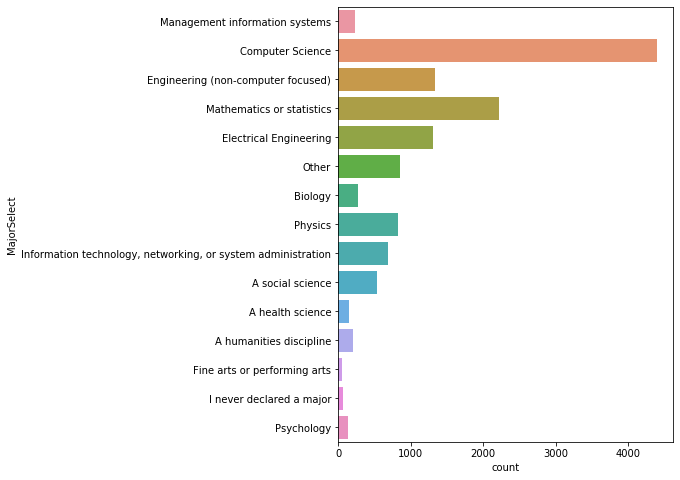

In [27]:
# on 
plt.figure(figsize=(6,8))
sns.countplot(y='MajorSelect', data=mcq)

In [30]:
# Employed status
mcq_es_count = pd.DataFrame(
    mcq['EmploymentStatus'].value_counts())
mcq_es_percent = pd.DataFrame(
    mcq['EmploymentStatus'].value_counts(normalize=True))
mcq_es_df = mcq_es_count.merge(
    mcq_es_percent, left_index=True, right_index=True)
mcq_es_df.columns = ['Answers', 'percentage']
mcq_es_df

,Answers,percentage
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


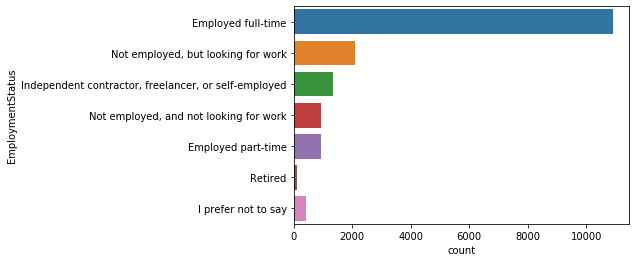

In [31]:
sns.countplot(y='EmploymentStatus', data=mcq)

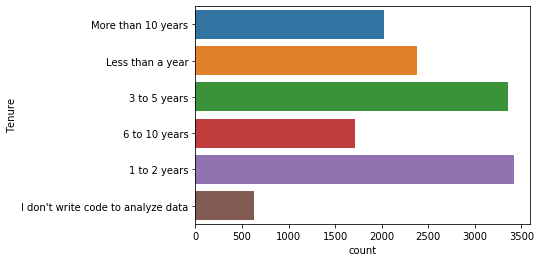

In [32]:
#Experience period
sns.countplot(y='Tenure', data=mcq)

The number of interviewees in Japan: 277


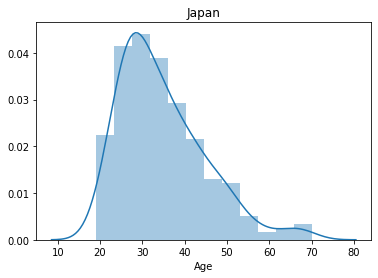

In [34]:
# in this case, I want to check japan status
japan = mcq.loc[(mcq['Country']=='Japan')]
print('The number of interviewees in Japan: '+str(japan.shape[0]))

sns.distplot(japan['Age'].dropna())
plt.title('Japan')
plt.show()

In [36]:
# Gender ratio
pd.DataFrame(japan['GenderSelect'].value_counts())

,GenderSelect
Male,254
Female,20
A different identity,3


Text(0.5, 1.0, 'Japan')

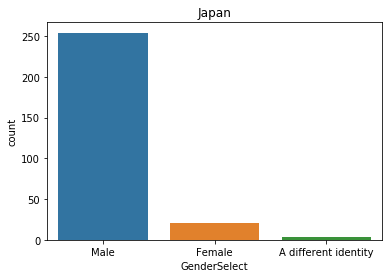

In [37]:
sns.countplot(x='GenderSelect', data=japan)
plt.title('Japan')

Text(0.5, 1.0, 'Japan Male')

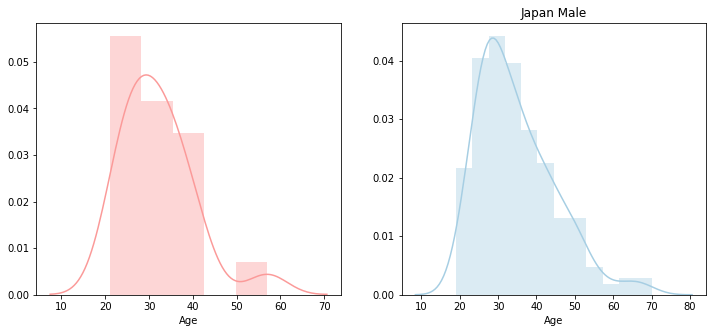

In [41]:
# Comparison of Genders
figure, (ax1, ax2) = plt.subplots(ncols=2) # display more than 2 graphs 
figure.set_size_inches(12,5)

sns.distplot(japan['Age'].loc[japan['GenderSelect']=='Female'].dropna(),
            norm_hist=False, color=sns.color_palette("Paired")[4], ax=ax1)
plt.title('Japan Female')
sns.distplot(japan['Age'].loc[japan['GenderSelect']=='Male'].dropna(),
            norm_hist=False, color=sns.color_palette("Paired")[0], ax=ax2)
plt.title('Japan Male')


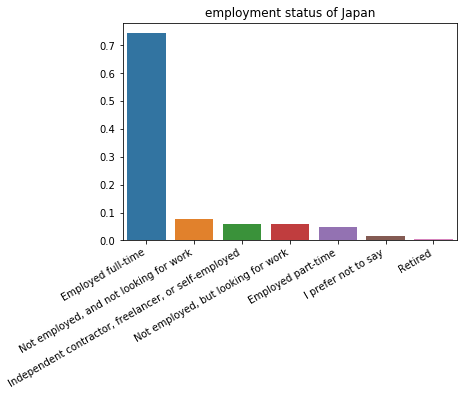

In [43]:
# Employed status in japan
sns.barplot(x=japan['EmploymentStatus'].unique(), 
            y=japan['EmploymentStatus'].value_counts()/len(japan))
plt.xticks(rotation=30, ha='right')
plt.title('employment status of Japan')
plt.ylabel('')
plt.show()

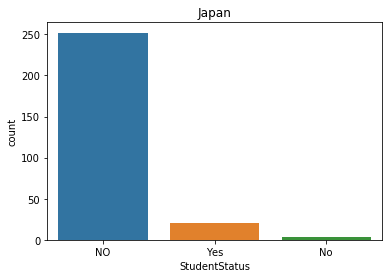

In [44]:
# Are you a student?
japan['StudentStatus'] = japan['StudentStatus'].fillna('NO')
sns.countplot(x='StudentStatus', data=japan)
plt.title('Japan')
plt.show()